# Libraries

In [1]:
!pip install -U textblob
!python -m textblob.download_corpora
!pip install wordcloud

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\tempo_capuz\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tempo_capuz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tempo_capuz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\tempo_capuz\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\tempo_capuz\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\tempo_capuz\AppData\Roaming\nltk_data...
[nltk_data]   Package 

In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Imbalanced Dataset Execution

In [3]:
filename = ('CleanedDataset.xlsx')

In [4]:
df = pd.read_excel(filename)

In [5]:
df.head(20)

,clean_text,Score,Sentiment
0,sir llavore nice instructor manages time well ...,0.743590,positive
1,explain well teaches us,0.282051,positive
2,responsible faculty member,0.333333,positive
3,excellent,0.692308,positive
4,great job meeting student needs class like inq...,2.384615,positive
5,good performance,0.487179,positive
6,gratitude instructor done us never forget,0.358974,positive
7,responsive regarding concerns student,0.384615,positive
8,teachers give many activities dont meet us gclass,0.000000,neutral
9,discussions informative,0.000000,neutral


# Check columns and info

In [6]:
df.columns

Index(['clean_text', 'Score', 'Sentiment'], dtype='object')

In [9]:
df.info

<bound method DataFrame.info of                                              clean_text     Score Sentiment
0     sir llavore nice instructor manages time well ...  0.743590  positive
1                               explain well teaches us  0.282051  positive
2                            responsible faculty member  0.333333  positive
3                                             excellent  0.692308  positive
4     great job meeting student needs class like inq...  2.384615  positive
...                                                 ...       ...       ...
8858  practice compassionate considerate understandi...  1.051282  positive
8859                           keep po thank concern us -0.282051  negative
8860  admire lot puts lot effort comes checking subm...  1.435897  positive
8861                             sir thank good teacher  0.871795  positive
8862                   thank good teacher understanding  0.871795  positive

[8863 rows x 3 columns]>

# Percentage presentation

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

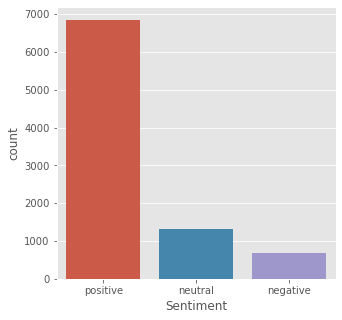

In [7]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Sentiment', data = df)

Text(0.5, 1.0, 'Distribution of sentiments')

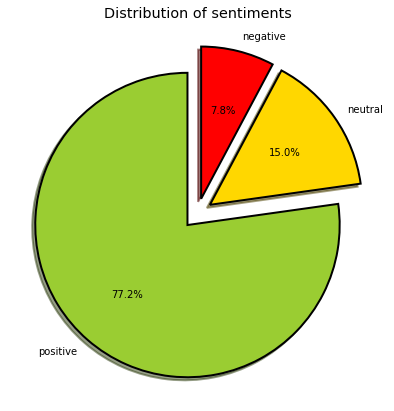

In [8]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = df['Sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [10]:
pos_comms = df[df.Sentiment == 'positive']
pos_comms = pos_comms.sort_values(['Score'], ascending= False)
pos_comms.head(20)

,clean_text,Score,Sentiment
6088,thank excellent educator value time patient ef...,7.666667,positive
1847,sir ernesto like father feel presence father t...,7.564103,positive
3368,hello sir thank considerations understanding g...,7.538462,positive
4478,sir nestor great educator student enjoyed love...,6.666667,positive
2373,facty members college college college educatio...,6.128205,positive
1335,really one kindest professors encountered far ...,6.076923,positive
151,hello sir nice day one students like give grea...,6.025641,positive
201,appreciate kind considerate approachable also ...,5.769231,positive
3865,mary jane great educator student enjoy love id...,5.743590,positive
1730,never failed inspire nursing purpose nursing e...,5.615385,positive


In [ ]:
pos_comms.info

In [ ]:
text = ' '.join([word for word in pos_comms['clean_text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive comments', fontsize=19)
plt.show()

In [ ]:
neg_comms = df[df.Sentiment == 'negative']
neg_comms = neg_comms.sort_values(['Score'], ascending= False)
neg_comms.head(20)

In [ ]:
neg_comms.info

In [ ]:
text = ' '.join([word for word in neg_comms['clean_text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [ ]:
neutral_comms = df[df.Sentiment == 'neutral']
neutral_comms = neutral_comms.sort_values(['Score'], ascending= False)
neutral_comms.head(20)


In [ ]:
neutral_comms.info

In [ ]:
text = ' '.join([str(word) for word in neutral_comms['clean_text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

# For Balance Dataset file execution

In [200]:
filename = ('NewDataset101.xlsx')

In [201]:
new_df = pd.read_excel(filename)

In [202]:
new_df.head()

,clean_text,Sentiment
0,princess considerate understands struggles stu...,negative
1,ms marquez avoids putting pressure students gi...,negative
2,make sure time subject gonna wasted also makes...,negative
3,hello po nice teach understand ones teach keep...,negative
4,hi po need make kase sinkin student kase po ma...,negative


# Training and Testing phase

In [203]:
vect = CountVectorizer(ngram_range=(1,2)).fit(new_df['clean_text'].apply(lambda x: np.str_(x)))

In [ ]:
#Change var new_df to execute the Imbalanced Dataset -- the file is included in upper Cell

In [204]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 16324

First 20 features:
 ['07', '07 sometimes', '10', '10 07', '10 days', '100', '100 words', '11', '11 close', '12', '12 believe', '1st', '1st year', '200', '200 100', '24', '24 deadline', '26', '26 done', '30']


In [212]:
X = new_df['clean_text'].apply(lambda x: np.str_(x))
Y = new_df['Sentiment']
X = vect.transform(X)

In [213]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
#For Test size, change the test_size var for desired percentage

In [214]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (1656, 16324)
Size of y_train: (1656,)
Size of x_test: (414, 16324)
Size of y_test: (414,)


In [215]:
import warnings
warnings.filterwarnings('ignore')

# Logistic Regression

In [216]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 83.33%


In [217]:
log_correct = (y_test == logreg.predict(x_test)).sum()

In [218]:
print(f'{log_correct} documents classified correctly')

345 documents classified correctly


In [219]:
log_incorrect = y_test.size - log_correct

In [220]:
print(f'{log_incorrect} documents classified incorrectly')

69 documents classified incorrectly


In [221]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[114  21  10]
 [  1 139   2]
 [ 10  25  92]]


              precision    recall  f1-score   support

    negative       0.91      0.79      0.84       145
     neutral       0.75      0.98      0.85       142
    positive       0.88      0.72      0.80       127

    accuracy                           0.83       414
   macro avg       0.85      0.83      0.83       414
weighted avg       0.85      0.83      0.83       414



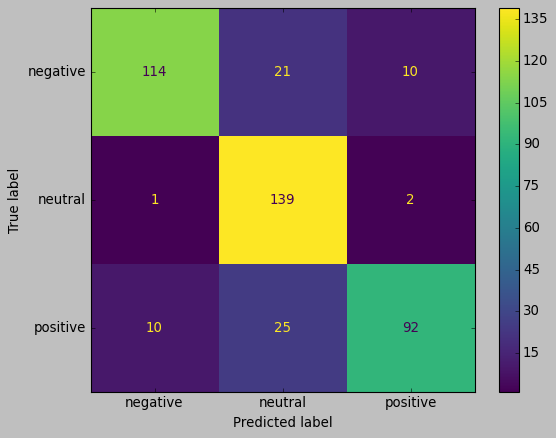

In [222]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

# Naive Bayes

In [223]:
nb = MultinomialNB()
nb.fit(x_train, y_train)
nb_pred = nb.predict(x_test)
nb_acc = accuracy_score(nb_pred, y_test)
print("Test accuracy: {:.2f}%".format(nb_acc*100))

Test accuracy: 72.22%


In [224]:
nb_correct = (y_test == nb.predict(x_test)).sum()

In [225]:
print(f'{nb_correct} documents classified correctly')

299 documents classified correctly


In [226]:
nb_incorrect = y_test.size - nb_correct

In [227]:
print(f'{nb_incorrect} documents classified incorrectly')

115 documents classified incorrectly


In [228]:
print(confusion_matrix(y_test, nb_pred))
print("\n")
print(classification_report(y_test, nb_pred))

[[113  17  15]
 [ 28  88  26]
 [ 19  10  98]]


              precision    recall  f1-score   support

    negative       0.71      0.78      0.74       145
     neutral       0.77      0.62      0.68       142
    positive       0.71      0.77      0.74       127

    accuracy                           0.72       414
   macro avg       0.73      0.72      0.72       414
weighted avg       0.73      0.72      0.72       414



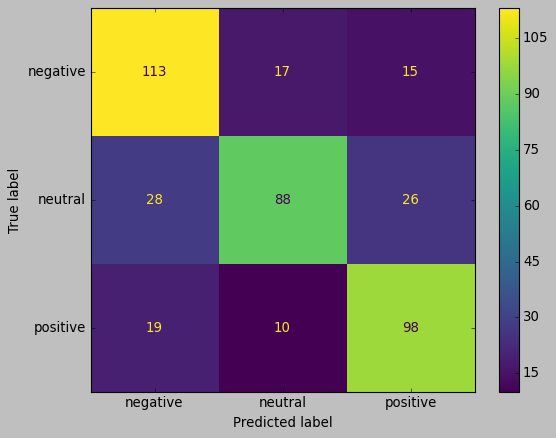

In [229]:
style.use('classic')
cm = confusion_matrix(y_test, nb_pred, labels=nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=nb.classes_)
disp.plot()

# SVM Model

In [230]:
from sklearn.svm import LinearSVC

In [231]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [232]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 84.06%


In [233]:
svm_correct = (y_test == SVCmodel.predict(x_test)).sum()

In [234]:
print(f'{svm_correct} documents classified correctly')

348 documents classified correctly


In [235]:
svm_incorrect = y_test.size - svm_correct

In [236]:
print(f'{svm_incorrect} documents classified incorrectly')

66 documents classified incorrectly


In [237]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[111  25   9]
 [  2 138   2]
 [  5  23  99]]


              precision    recall  f1-score   support

    negative       0.94      0.77      0.84       145
     neutral       0.74      0.97      0.84       142
    positive       0.90      0.78      0.84       127

    accuracy                           0.84       414
   macro avg       0.86      0.84      0.84       414
weighted avg       0.86      0.84      0.84       414



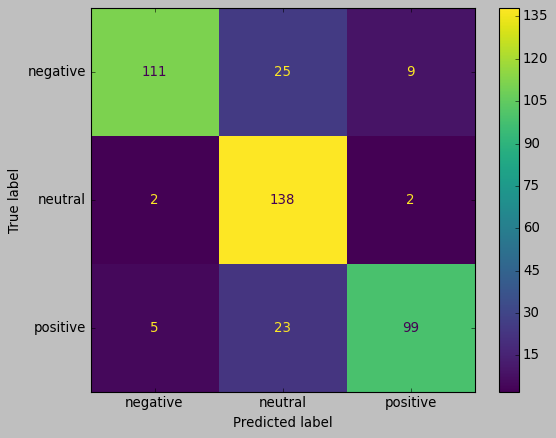

In [238]:
style.use('classic')
cm = confusion_matrix(y_test, svc_pred, labels=SVCmodel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=SVCmodel.classes_)
disp.plot()

# END